# Relatório IV - Econometria

Inferência estatistica

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Walassseee/Econometria/main/Dados/microdados_enade_2018econ.csv'
dados = pd.read_csv(url, sep=';')
dados = dados.drop_duplicates()

dados.head()

,Ano Fim Em,Ano In Grad,Co Categad,Co Grupo,Co Ies,Co Munic Curso,Co Rs I1,Co Rs I2,Co Rs I3,Co Rs I4,...,Tp Pr Di Fg,Tp Pr Ger,Tp Pr Ob Ce,Tp Pr Ob Fg,Tp Pres,Tp Sce D1,Tp Sce D2,Tp Sce D3,Tp Sfg D1,Tp Sfg D2
0,2012,2013,10002,13,789,1400100,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222
1,1987,1988,10002,13,583,2304400,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222
2,2004,2005,10002,13,583,2304400,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222
3,2007,2008,115,13,746,2304202,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222
4,1998,2000,115,13,746,2304202,NaN,NaN,NaN,NaN,...,222,222,222,222,222,222,222,222,222,222


## Tratando Dados

In [ ]:
dados = dados[['Nu Idade','Nt Ger']].dropna()
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8073 entries, 33 to 9578
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Nu Idade  8073 non-null   int64 
 1   Nt Ger    8073 non-null   object
dtypes: int64(1), object(1)
memory usage: 189.2+ KB


In [ ]:
dados['Nt Ger'] = dados['Nt Ger'].replace(',','.', regex=True)
dados['Nt Ger'] = dados['Nt Ger'].astype(float)
dados['Nu Idade'] = dados['Nu Idade'].astype(float)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8073 entries, 33 to 9578
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nu Idade  8073 non-null   float64
 1   Nt Ger    8073 non-null   float64
dtypes: float64(2)
memory usage: 189.2 KB


## Estatística descritiva

In [ ]:
dados.describe().round(2)

,Nu Idade,Nt Ger
count,8073.00,8073.00
mean,26.24,38.40
std,5.30,13.14
min,20.00,0.00
25%,23.00,28.90
50%,25.00,37.20
75%,28.00,47.00
max,69.00,90.20


Temos uma amostra de 8073 alunos sem duplicações

A média de idade é de 26 anos com desvio de 5. Menor idade de 20 anos e Maior de 69. Sendo o 3 quartil de 28 anos. Logo já podemos ver que essa distribuição talvez não siga uma distribuição normal.

Nas notas temos uma média de 38,40 pontos com desvia de 13,14. A menor nota foi 0 e a maior de 90,20 sendo a mediana de 37,20 bem proxima da média o que pode indicar uma distribuição mais normalizada

In [ ]:
dados.cov()

,Nu Idade,Nt Ger
Nu Idade,28.117796,-11.057620
Nt Ger,-11.057620,172.600692


In [ ]:
dados.corr()

,Nu Idade,Nt Ger
Nu Idade,1.000000,-0.158727
Nt Ger,-0.158727,1.000000


In [ ]:
dados.corr(method='spearman')

,Nu Idade,Nt Ger
Nu Idade,1.000000,-0.208142
Nt Ger,-0.208142,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

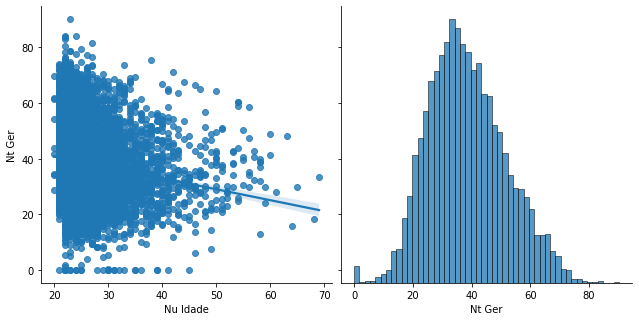

In [ ]:
ax = sns.pairplot(dados, y_vars='Nt Ger', x_vars=['Nu Idade','Nt Ger'], kind='reg', height=4.5)
plt.show()

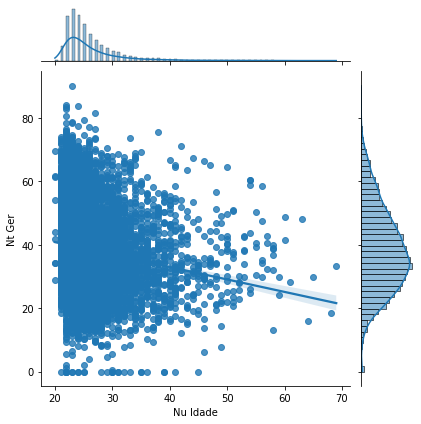

In [ ]:
ax = sns.jointplot(data=dados, y='Nt Ger', x='Nu Idade', kind='reg')
plt.show()

Notamos que as variáveis desse modo não possuem correlação tanto pela correlação de Pearson quanto graficamente. Isso talvez se de pelo fato de que as distribuições não seguirem uma distribuição normal. Para isso favor conferir fazendo um teste de hipótese e caso necessário tratar com uma conversão logaritimica.

## Teste de normalidade

In [ ]:
from scipy.stats import normaltest
import numpy as np

alpha = 0.5

stats_test, p_value = normaltest(dados['Nt Ger'])
print(p_value < alpha)

True


In [ ]:
alpha = 0.5

stats_test, p_value = normaltest(dados['Nu Idade'])
print(p_value < alpha)

True


## Regressão Linear Simples

### Direto

Temos que ambas as distribuições rejeitaram a hipótese nula. Sendo assim as distribuições não seguem uma distribuição normal. Sendo assim vamos fazer uma normalização

In [ ]:
import statsmodels.api as sm

y = dados['Nt Ger']
X = sm.add_constant(dados['Nu Idade'])

modelo = sm.OLS(y, X, missing='drop').fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Nt Ger   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     208.6
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           1.06e-46
Time:                        14:15:44   Log-Likelihood:                -32144.
No. Observations:                8073   AIC:                         6.429e+04
Df Residuals:                    8071   BIC:                         6.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.7185      0.729     66.825      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Direto - Log

In [ ]:
y = dados['Nt Ger']
X = sm.add_constant(np.log(dados['Nu Idade']))

modelo = sm.OLS(y, X, missing='drop').fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Nt Ger   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     258.0
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           3.51e-57
Time:                        14:15:45   Log-Likelihood:                -32119.
No. Observations:                8073   AIC:                         6.424e+04
Df Residuals:                    8071   BIC:                         6.426e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.0889      2.724     30.139      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Log - Log

In [ ]:
y = np.log(dados['Nt Ger'] + 1)
X = sm.add_constant(np.log(dados['Nu Idade']))

modelo = sm.OLS(y, X, missing='drop').fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Nt Ger   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     213.9
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           8.08e-48
Time:                        14:16:42   Log-Likelihood:                -4212.4
No. Observations:                8073   AIC:                             8429.
Df Residuals:                    8071   BIC:                             8443.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8604      0.086     56.598      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### X2

In [ ]:
y = dados['Nt Ger'] ** 2
X = sm.add_constant(dados['Nu Idade'] ** 2)

modelo = sm.OLS(y, X, missing='drop').fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Nt Ger   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     144.4
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           5.46e-33
Time:                        14:17:29   Log-Likelihood:                -67817.
No. Observations:                8073   AIC:                         1.356e+05
Df Residuals:                    8071   BIC:                         1.357e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1938.6310     27.068     71.621      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
